# Theoretical

-

### **Support Vector Machines (SVM)**

**1. What is a Support Vector Machine (SVM)?**
SVM is a supervised learning algorithm that finds the best boundary (hyperplane) to separate different classes by maximizing the margin between them.
**---**

**2. What is the difference between Hard Margin and Soft Margin SVM?**
Hard Margin SVM assumes perfect separation with no misclassifications. Soft Margin SVM allows some misclassifications to handle noisy or overlapping data.
**---**

**3. What is the mathematical intuition behind SVM?**
SVM aims to maximize the distance between the separating hyperplane and the nearest data points (support vectors) by solving a convex optimization problem.
**---**

**4. What is the role of Lagrange Multipliers in SVM?**
They convert the constrained optimization problem into its dual form, making it easier to solve and identify support vectors.
**---**

**5. What are Support Vectors in SVM?**
These are the critical data points closest to the decision boundary that directly affect the position and orientation of the hyperplane.
**---**

**6. What is a Support Vector Classifier (SVC)?**
SVC is the classification implementation of SVM in libraries like scikit-learn, capable of handling binary and multiclass problems.
**---**

**7. What is a Support Vector Regressor (SVR)?**
SVR applies SVM for regression tasks, fitting a function that deviates from actual targets by a margin no greater than ε.
**---**

**8. What is the Kernel Trick in SVM?**
The kernel trick maps data to a higher-dimensional space using a kernel function without explicitly performing the transformation, enabling non-linear separation.
**---**

**9. Compare Linear Kernel, Polynomial Kernel, and RBF Kernel:**

* **Linear:** For linearly separable data.
* **Polynomial:** Captures interactions of features with degrees.
* **RBF:** Maps to infinite-dimensional space, ideal for complex boundaries.
  **---**

**10. What is the effect of the C parameter in SVM?**
C controls the trade-off between maximizing the margin and minimizing classification error. Small C = wider margin, large C = less tolerance to misclassification.
**---**

**11. What is the role of the Gamma parameter in RBF Kernel SVM?**
Gamma defines how far the influence of a training point reaches. High gamma = tight influence; Low gamma = broader influence.
**---**

---

### **Naïve Bayes**

**12. What is the Naïve Bayes classifier, and why is it called "Naïve"?**
It's a probabilistic classifier based on Bayes' Theorem. It's "naïve" because it assumes feature independence, which rarely holds in real-world data.
**---**

**13. What is Bayes’ Theorem?**

$$
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
$$

It calculates the probability of event A given that event B has occurred.
**---**

**14. Explain the differences between Gaussian, Multinomial, and Bernoulli Naïve Bayes:**

* **Gaussian:** Assumes features are normally distributed (continuous).
* **Multinomial:** For count data like word frequency.
* **Bernoulli:** For binary features (e.g., presence/absence).
  **---**

**15. When should you use Gaussian Naïve Bayes over other variants?**
Use it when your data contains continuous variables that follow a normal distribution.
**---**

**16. What are the key assumptions made by Naïve Bayes?**

* Features are conditionally independent.
* All features contribute equally and independently to the outcome.
  **---**

**17. What are the advantages and disadvantages of Naïve Bayes?**

* **Advantages:** Fast, simple, works well with high-dimensional data.
* **Disadvantages:** Assumes independence, may perform poorly with correlated features.
  **---**

**18. Why is Naïve Bayes a good choice for text classification?**
It handles large vocabularies, is efficient with sparse data, and often performs well even with naive assumptions.
**---**

**19. Compare SVM and Naïve Bayes for classification tasks:**

* **SVM:** More accurate for complex data; slower training.
* **Naïve Bayes:** Faster, works well for text and high-dimensional data, less accurate with correlated features.
  **---**

**20. How does Laplace Smoothing help in Naïve Bayes?**
It prevents zero probabilities by adding a small constnfluence predictions.
**---**

Let me know if you'd like these formatted in a Word or PDF file as well!


# Practical

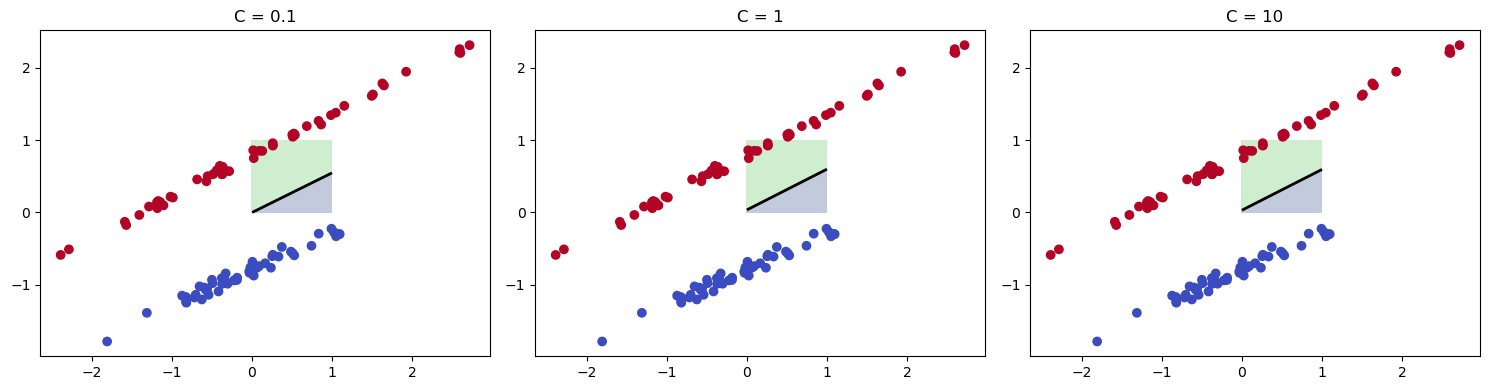

In [1]:
# 27 Train an SVM Classifier with different C values and compare the decision boundaries visually

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.preprocessing import StandardScaler

# Load dataset
X, y = datasets.make_classification(n_features=2, n_redundant=0, n_informative=2,
                                    n_clusters_per_class=1, n_samples=100, random_state=42)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Different C values
Cs = [0.1, 1, 10]
plt.figure(figsize=(15, 4))

for i, C in enumerate(Cs):
    clf = svm.SVC(kernel='linear', C=C)
    clf.fit(X, y)

    # Plot decision boundary
    plt.subplot(1, 3, i + 1)
    plt.title(f"C = {C}")
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                         np.linspace(ylim[0], ylim[1], 100))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z > 0, alpha=0.3)
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='k')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)

plt.tight_layout()
plt.show()

In [2]:
# 28 Train a Bernoulli Naïve Bayes classifier for binary classification

from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

# Create binary feature dataset
X, y = make_classification(n_features=10, n_informative=5, n_classes=2, random_state=42)
X_binary = (X > 0).astype(int)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_binary, y, test_size=0.3, random_state=42)

# Train and predict
model = BernoulliNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("BernoulliNB Accuracy:", accuracy_score(y_test, y_pred))

BernoulliNB Accuracy: 0.8333333333333334


In [3]:
# 29 Apply feature scaling before training an SVM model and compare results

from sklearn.svm import SVC

# Without scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model_unscaled = SVC()
model_unscaled.fit(X_train, y_train)
acc_unscaled = model_unscaled.score(X_test, y_test)

# With scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
model_scaled = SVC()
model_scaled.fit(X_train_s, y_train_s)
acc_scaled = model_scaled.score(X_test_s, y_test_s)

print("Accuracy without scaling:", acc_unscaled)
print("Accuracy with scaling:", acc_scaled)

Accuracy without scaling: 0.8
Accuracy with scaling: 0.8333333333333334


In [4]:
# 30. Train Gaussian Naïve Bayes and compare predictions before and after Laplace smoothing

from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Load data
data = load_iris()
X, y = data.data, data.target

# Introduce zeros to simulate need for smoothing (make small adjustments)
X_mod = X.copy()
X_mod[X_mod < np.median(X_mod)] = 0  # Zero some features

X_train, X_test, y_train, y_test = train_test_split(X_mod, y, random_state=42)

# GaussianNB doesn't have explicit Laplace smoothing, but we can add small value to variance
class GaussianNBWithSmoothing(GaussianNB):
    def __init__(self, var_smoothing=1e-9):
        super().__init__(var_smoothing=var_smoothing)

# Without smoothing (default very small smoothing)
gnb_default = GaussianNB()
gnb_default.fit(X_train, y_train)
pred_default = gnb_default.predict(X_test)

# With higher smoothing
gnb_smoothed = GaussianNBWithSmoothing(var_smoothing=1e-2)
gnb_smoothed.fit(X_train, y_train)
pred_smoothed = gnb_smoothed.predict(X_test)

print("Accuracy without smoothing:", accuracy_score(y_test, pred_default))
print("Accuracy with Laplace smoothing:", accuracy_score(y_test, pred_smoothed))


Accuracy without smoothing: 0.868421052631579
Accuracy with Laplace smoothing: 0.868421052631579


In [5]:
# 31. Train SVM and use GridSearchCV to tune hyperparameters (C, gamma, kernel)

from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

data = load_digits()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly']
}

grid = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)

y_pred = grid.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Test Accuracy: 0.9888888888888889


In [6]:
# 32. Train SVM on imbalanced dataset with class weighting and check if accuracy improves

from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from collections import Counter

# Create imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=20, weights=[0.9, 0.1],
                           n_classes=2, random_state=42)

print("Class distribution:", Counter(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Without class weights
svm_no_weight = SVC()
svm_no_weight.fit(X_train, y_train)
pred_no_weight = svm_no_weight.predict(X_test)
acc_no_weight = accuracy_score(y_test, pred_no_weight)

# With class weights
svm_weighted = SVC(class_weight='balanced')
svm_weighted.fit(X_train, y_train)
pred_weighted = svm_weighted.predict(X_test)
acc_weighted = accuracy_score(y_test, pred_weighted)

print(f"Accuracy without class weights: {acc_no_weight:.3f}")
print(f"Accuracy with class weights: {acc_weighted:.3f}")

print("Classification report with class weights:")
print(classification_report(y_test, pred_weighted))

Class distribution: Counter({0: 897, 1: 103})
Accuracy without class weights: 0.912
Accuracy with class weights: 0.916
Classification report with class weights:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       226
           1       0.56      0.58      0.57        24

    accuracy                           0.92       250
   macro avg       0.76      0.77      0.76       250
weighted avg       0.92      0.92      0.92       250



In [ ]:
# 34. Train SVM and Naïve Bayes on same dataset and compare accuracy

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

data = load_wine()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)

# SVM
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)

# Naïve Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
nb_pred = gnb.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred)

print(f"SVM Accuracy: {svm_acc:.3f}")
print(f"Naïve Bayes Accuracy: {nb_acc:.3f}")

In [ ]:
# 35. Perform feature selection before training Naïve Bayes and compare results

from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Without feature selection
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
acc_full = accuracy_score(y_test, y_pred)

# With feature selection (top 10 features)
selector = SelectKBest(chi2, k=10)
X_train_sel = selector.fit_transform(X_train, y_train)
X_test_sel = selector.transform(X_test)

gnb_sel = GaussianNB()
gnb_sel.fit(X_train_sel, y_train)
y_pred_sel = gnb_sel.predict(X_test_sel)
acc_sel = accuracy_score(y_test, y_pred_sel)

print(f"Accuracy without feature selection: {acc_full:.3f}")
print(f"Accuracy with feature selection: {acc_sel:.3f}")

In [ ]:
# 36. Train SVM using One-vs-Rest and One-vs-One on Wine dataset and compare accuracy

from sklearn.datasets import load_wine
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_wine()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)

# OvR
ovr = OneVsRestClassifier(SVC())
ovr.fit(X_train, y_train)
ovr_pred = ovr.predict(X_test)
acc_ovr = accuracy_score(y_test, ovr_pred)

# OvO
ovo = OneVsOneClassifier(SVC())
ovo.fit(X_train, y_train)
ovo_pred = ovo.predict(X_test)
acc_ovo = accuracy_score(y_test, ovo_pred)

print(f"OvR Accuracy: {acc_ovr:.3f}")
print(f"OvO Accuracy: {acc_ovo:.3f}")


In [ ]:
# 37. Train SVM using Linear, Polynomial, and RBF kernels on Breast Cancer dataset and compare accuracy

sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)

kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)
    pred = svm.predict(X_test)
    acc = accuracy_score(y_test, pred)
    print(f"Kernel: {kernel}, Accuracy: {acc:.3f}")

In [ ]:
# 38. Train SVM using Stratified K-Fold Cross-Validation and compute average accuracy

from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np

data = load_iris()
X, y = data.data, data.target

skf = StratifiedKFold(n_splits=5)
accuracies = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    svm = SVC()
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

print(f"Average accuracy: {np.mean(accuracies):.3f}")

In [ ]:
# 39. Train Naïve Bayes classifier with different prior probabilities and compare performance

from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)

# Default prior (learned from data)
gnb_default = GaussianNB()
gnb_default.fit(X_train, y_train)
pred_default = gnb_default.predict(X_test)
acc_default = accuracy_score(y_test, pred_default)

# Custom prior probabilities (equal for 3 classes)
priors = [1/3, 1/3, 1/3]
gnb_prior = GaussianNB(priors=priors)
gnb_prior.fit(X_train, y_train)
pred_prior = gnb_prior.predict(X_test)
acc_prior = accuracy_score(y_test, pred_prior)

print(f"Accuracy with learned priors: {acc_default:.3f}")
print(f"Accuracy with uniform priors: {acc_prior:.3f}")

In [ ]:
# 40. Perform Recursive Feature Elimination (RFE) before training SVM and compare accuracy

from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)

# Without RFE
svm = SVC()
svm.fit(X_train, y_train)
pred = svm.predict(X_test)
acc_no_rfe = accuracy_score(y_test, pred)

# With RFE (select half features)
selector = RFE(SVC(kernel="linear"), n_features_to_select=int(X_train.shape[1] / 2), step=1)
selector = selector.fit(X_train, y_train)

X_train_rfe = selector.transform(X_train)
X_test_rfe = selector.transform(X_test)

svm_rfe = SVC()
svm_rfe.fit(X_train_rfe, y_train)
pred_rfe = svm_rfe.predict(X_test_rfe)
acc_rfe = accuracy_score(y_test, pred_rfe)

print(f"Accuracy without RFE: {acc_no_rfe:.3f}")
print(f"Accuracy with RFE: {acc_rfe:.3f}")


In [ ]:
# 41. Train SVM and evaluate with Precision, Recall, and F1-Score instead of accuracy

from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)

svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1-Score (macro):", f1_score(y_test, y_pred, average='macro'))

In [ ]:
# 42. Train Naïve Bayes and evaluate using Log Loss (Cross-Entropy Loss)

from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_prob = gnb.predict_proba(X_test)

loss = log_loss(y_test, y_prob)
print(f"Log Loss: {loss:.3f}")


In [ ]:
# 43. Train SVM and visualize Confusion Matrix using seaborn

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

data = load_digits()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)

svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM')
plt.show()

In [ ]:
# 44. Train SVM Regressor (SVR) and evaluate performance using Mean Absolute Error (MAE)

from sklearn.datasets import load_boston
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Load Boston housing data (depreciated, use California housing if needed)
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)

svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.3f}")